# Context

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

 
# Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

 
# Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [2]:
# loading data
data = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3571 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


<IPython.core.display.Javascript object>

**Observations**

- The data cover a variety of brands like Samsung, Sony, LG, etc.
- A high percentage of devices seem to be running on Android.
- There are a few missing values in the data.

In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

- `brand_name`, `os`, `4g`, and `5g` are *object* type columns while the rest are numeric in nature.

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [8]:
# checking for missing values in the data
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

- As noted before, there are a few missing values in the data.

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

**Observations**

- There are 33 brands in the data and a category *Others* too.
- Android is the most common OS for the used phones.
- The phone weight ranges from 23g to ~1kg, which is unusual.
- There are a few unusual values for the internal memory and RAM of used phones too.
- The average value of the price of a used phone is approx. half the price of a new model of the same phone.

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**`used_price`**

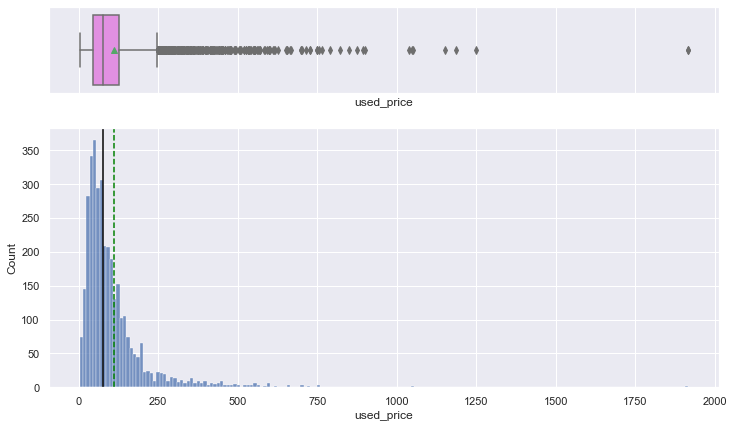

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "used_price")

**Observations**

- The distribution of used phone prices is heavily right-skewed, with a mean value of ~100 euros.
- Let's apply the log transform to see if we can make the distribution closer to normal.

In [12]:
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

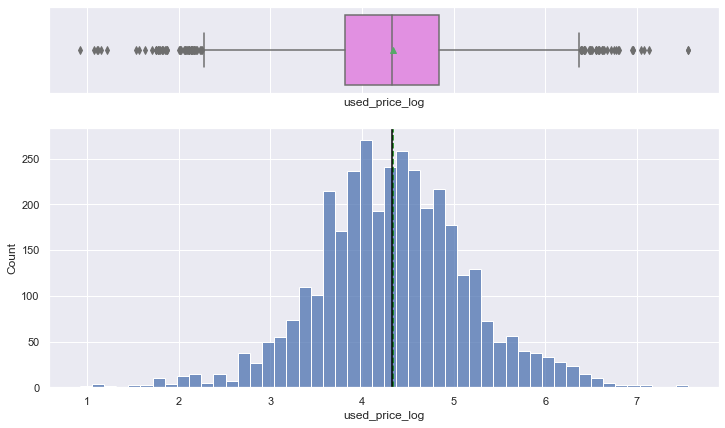

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "used_price_log")

- The used phone prices are almost normally distributed now.

**`new_price`**

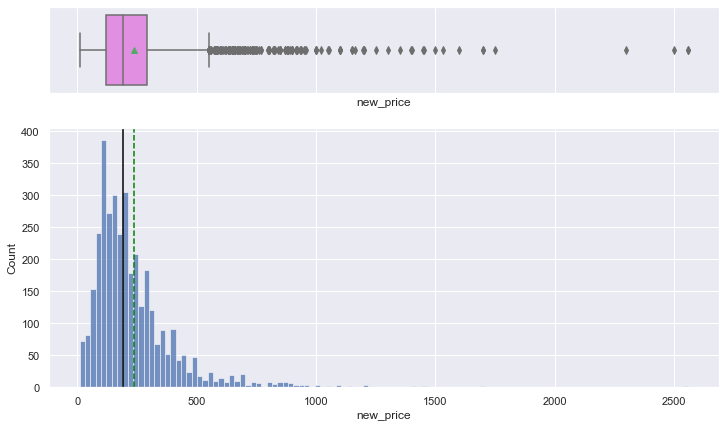

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "new_price")

**Observations**

- The distribution is heavily right-skewed, with a mean value of ~200 euros.
- Let's apply the log transform to see if we can make the distribution closer to normal.

In [15]:
# let's apply the log transform to see if we can make the distribution of new_price closer to normal
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

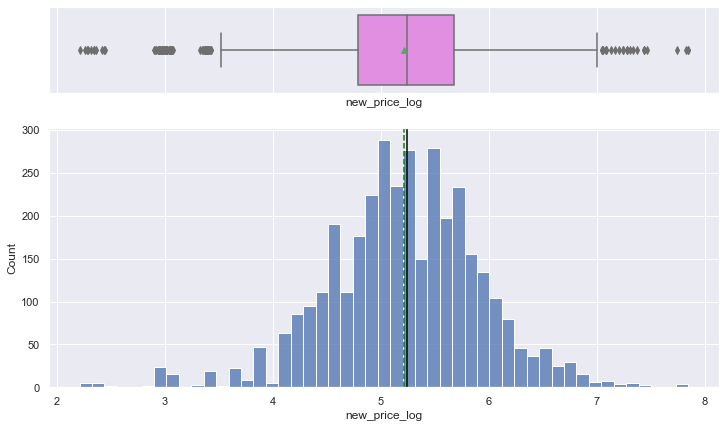

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "new_price_log")

- The prices of new phone models are almost normally distributed now.

**`screen_size`**

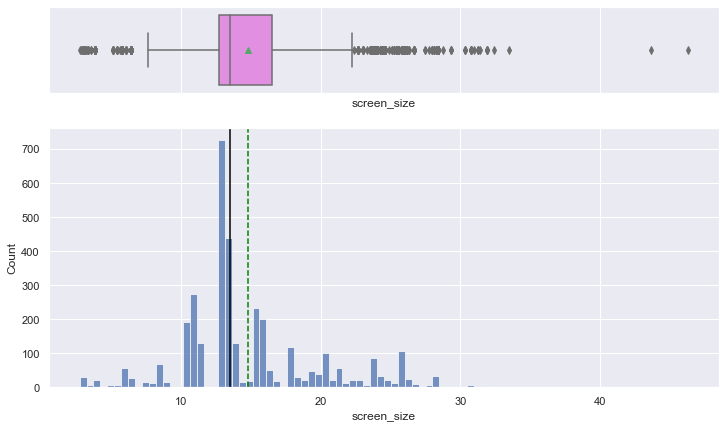

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "screen_size")

- Around 50% of the phones have a screen larger than 13cm.

**`main_camera_mp`**

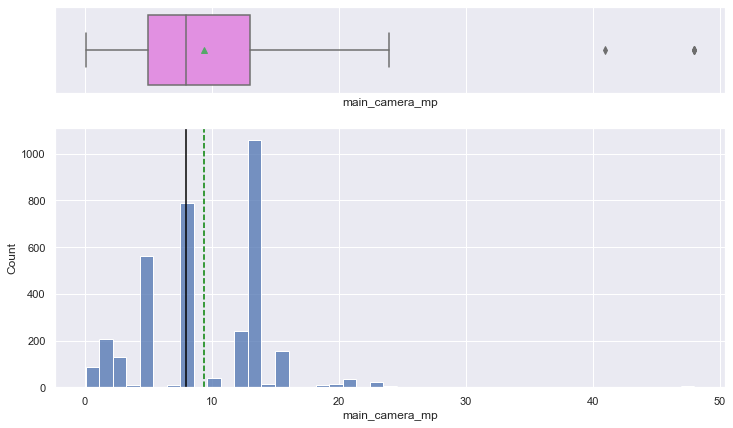

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "main_camera_mp")

- Few phones offer rear cameras with more than 20MP resolution.

**`selfie_camera_mp`**

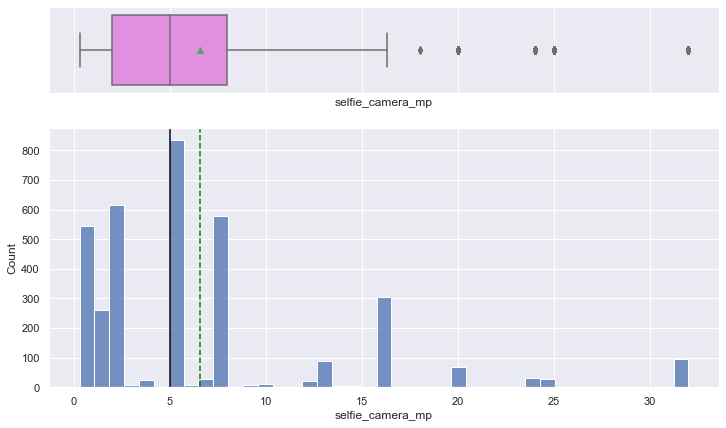

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

- Few phones offer front cameras with more than 16MP resolution.

**`int_memory`**

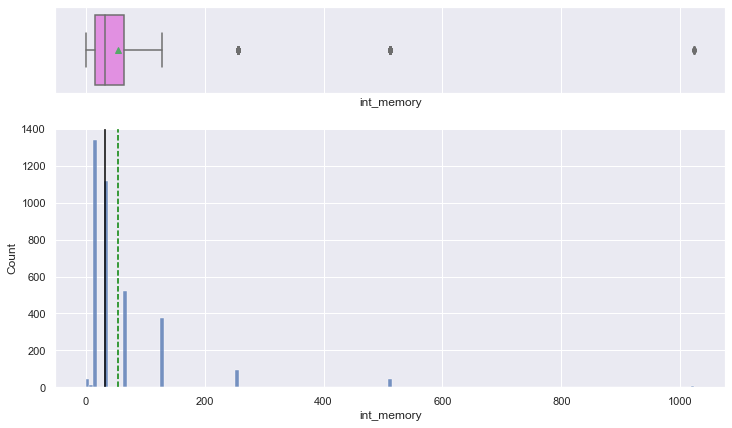

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "int_memory")

- Few phones offer more than 256GB internal memory.

**`ram`**

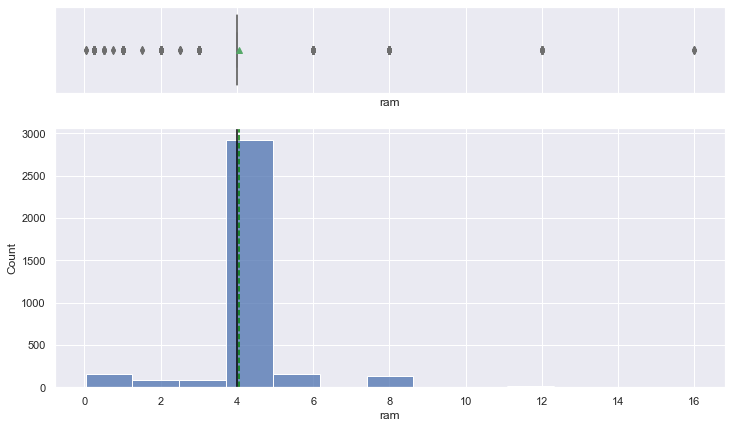

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "ram")

- Very few phones offer greater than 8GB RAM.

**`weight`**

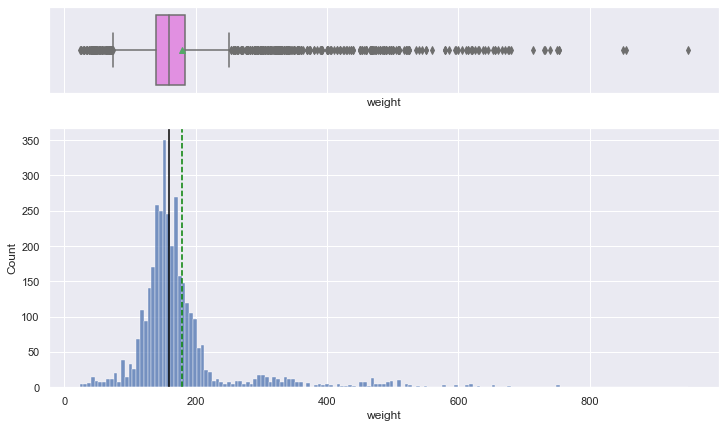

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "weight")

- The distribution of weight is close to normally distributed with many upper outliers.

**`battery`**

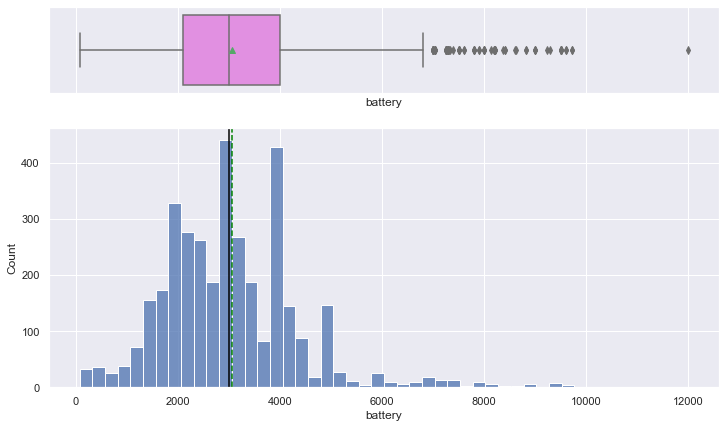

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "battery")

- The distribution of energy capacity of phone battery is close to normally distributed with a few upper outliers.

**`days_used`**

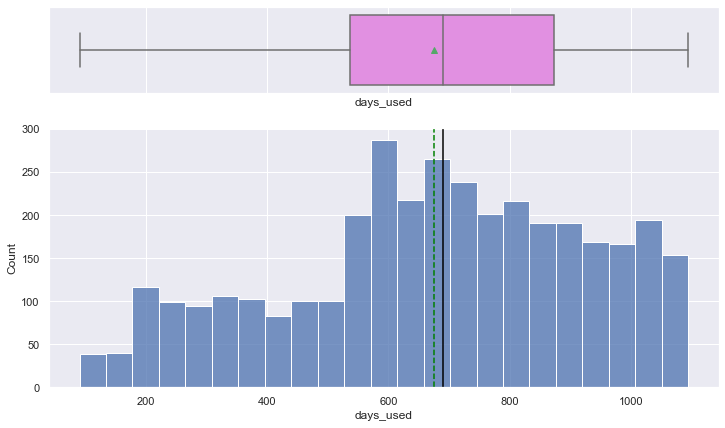

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "days_used")

- Around 50% of the phones in the data are more than 700 days old.

**Few smartphones have a screen size less than 4 inches or greater than 8 inches. Let's check them.**

In [25]:
df[(df.screen_size < 4 * 2.54) | (df.screen_size > 8 * 2.54)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96,4.465448,4.715100
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49,5.084443,5.519018
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55,5.593037,5.884631
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23,5.194234,5.630961
5,Honor,Android,21.43,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.7000,113.67,4.733300,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,Realme,Android,24.29,yes,yes,NaN,8.0,64.0,6.0,4200.0,202.0,2020,282,203.9915,135.78,4.911036,5.318078
3524,Realme,Android,23.50,yes,no,NaN,8.0,32.0,3.0,5000.0,195.0,2020,113,118.9915,91.43,4.515574,4.779052
3558,Samsung,Others,3.18,yes,no,12.0,9.0,4.0,1.5,340.0,42.0,2019,524,240.6435,120.38,4.790653,5.483317
3560,Samsung,Android,25.88,yes,no,8.0,5.0,32.0,2.0,3000.0,141.0,2019,383,74.3835,48.47,3.880945,4.309234


<IPython.core.display.Javascript object>

**Observations**

- There are a lot of phones which have very small or very large screen sizes.
- These are unusual values for a smartphone and need to be fixed.
- We will treat them as missing values and impute them later.

In [26]:
idx = df[(df.screen_size < 4 * 2.54) | (df.screen_size > 8 * 2.54)].index
df.loc[idx, "screen_size"] = np.nan

<IPython.core.display.Javascript object>

**Few smartphones weigh less than 80g or greater than 350g. Let's check them.**

In [27]:
df[(df.weight < 80) | (df.weight > 350)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
3,Honor,Android,NaN,yes,yes,13.0,8.0,64.0,6.00,7250.0,480.0,2020,345,278.9300,180.23,5.194234,5.630961
13,Honor,Others,NaN,no,no,13.0,16.0,4.0,4.00,455.0,41.0,2019,432,179.6200,89.77,4.497251,5.190844
22,Others,Android,20.32,no,no,8.0,0.3,16.0,1.00,5680.0,453.6,2013,933,240.9000,72.36,4.281654,5.484382
34,Huawei,Android,NaN,yes,no,8.0,8.0,64.0,4.00,7250.0,450.0,2020,211,249.3300,185.66,5.223917,5.518777
37,Huawei,Android,NaN,yes,yes,13.0,8.0,128.0,6.00,7250.0,460.0,2020,139,550.2300,413.14,6.023787,6.310336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,Huawei,Others,NaN,no,no,10.5,16.0,4.0,16.00,455.0,43.0,2020,117,126.6500,95.43,4.558393,4.841427
3327,Huawei,Others,NaN,no,no,13.0,16.0,4.0,0.03,455.0,41.0,2019,311,145.3415,95.75,4.561741,4.979086
3459,Huawei,Others,NaN,no,no,10.5,16.0,4.0,16.00,455.0,43.0,2020,185,126.6500,93.52,4.538175,4.841427
3470,Huawei,Others,NaN,no,no,13.0,16.0,4.0,0.03,455.0,41.0,2019,524,145.3415,72.69,4.286204,4.979086


<IPython.core.display.Javascript object>

**Observations**

- There are quite a few phones which have unusual weights for a smartphone.
- The weights and screen sizes of these phones are aligned, i.e, there are bigger phones which weigh too much and smaller phones which weigh too little.
- We will treat them as missing values and impute them later.

In [28]:
idx = df[(df.weight < 80) | (df.weight > 350)].index
df.loc[idx, "weight"] = np.nan

<IPython.core.display.Javascript object>

**Few smartphones have very low internal memory and RAM. Let's check them**

In [29]:
df[df.int_memory < 1]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
105,Micromax,Android,10.16,no,no,2.00,0.30,0.500,0.25,1500.0,146.5,2014,1016,50.74,15.24,2.723924,3.926715
106,Micromax,Android,NaN,no,no,0.30,0.30,0.500,0.25,1500.0,89.0,2014,956,39.05,11.79,2.467252,3.664843
107,Micromax,Android,NaN,no,no,2.00,0.30,0.200,4.00,2000.0,85.0,2013,680,69.73,27.80,3.325036,4.244631
115,Nokia,Others,NaN,no,no,0.30,5.00,0.005,2.50,1020.0,90.5,2020,272,29.96,13.10,2.572612,3.399863
116,Nokia,Others,NaN,no,no,0.30,5.00,0.005,2.50,1020.0,91.3,2020,288,18.38,12.63,2.536075,2.911263
118,Nokia,Others,NaN,no,no,0.30,5.00,0.020,8.00,1200.0,88.2,2020,266,40.41,35.02,3.555919,3.699077
119,Nokia,Others,NaN,yes,no,0.30,8.00,0.020,16.00,1200.0,86.5,2019,234,39.98,30.80,3.427515,3.688379
120,Nokia,Others,14.76,no,no,0.08,8.00,0.005,4.00,800.0,NaN,2019,195,19.22,14.37,2.665143,2.955951
121,Nokia,Others,14.76,no,no,5.00,8.00,0.005,4.00,800.0,NaN,2019,350,11.27,6.55,1.879465,2.422144
330,Micromax,Android,10.16,no,no,2.00,0.30,0.500,0.25,1500.0,146.5,2014,900,49.00,14.74,2.690565,3.891820


<IPython.core.display.Javascript object>

In [30]:
df[df.ram < 0.25]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,used_price_log,new_price_log
420,Others,Others,NaN,no,no,0.3,0.3,0.06,0.03,3400.0,80.0,2019,514,29.2500,14.60,2.681022,3.375880
3327,Huawei,Others,NaN,no,no,13.0,16.0,4.00,0.03,455.0,NaN,2019,311,145.3415,95.75,4.561741,4.979086
3470,Huawei,Others,NaN,no,no,13.0,16.0,4.00,0.03,455.0,NaN,2019,524,145.3415,72.69,4.286204,4.979086


<IPython.core.display.Javascript object>

**Observations**

- There are few phones which have very low internal memory and/or a low amount of RAM, which doesn't seem to be correct.
- We will treat them as missing values and impute them later.

In [31]:
idx = df[df.int_memory < 1].index
df.loc[idx, "int_memory"] = np.nan

<IPython.core.display.Javascript object>

In [32]:
idx = df[df.ram < 0.25].index
df.loc[idx, "ram"] = np.nan

<IPython.core.display.Javascript object>

In [33]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`brand_name`**

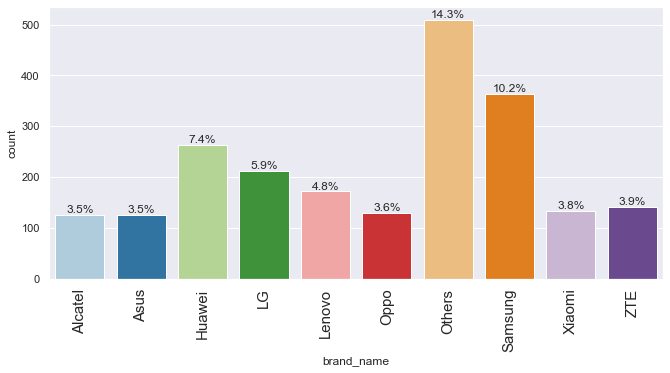

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations**

- Samsung has the most number of phones in the data, followed by Huawei and LG.
- Around 14% of the phones in the data are from brands other than the listed ones.

**`os`**

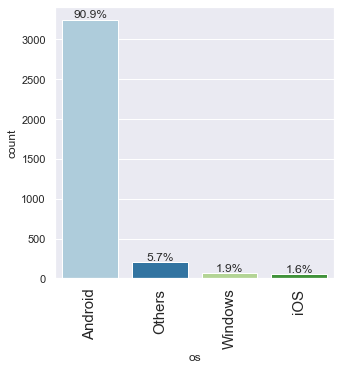

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "os", perc=True)

- Android phones dominate more than 90% of the used phone market.

**`4g`**

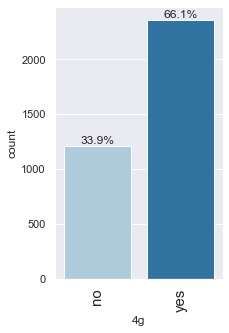

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "4g", perc=True)

- Nearly two-thirds of the phones in this data have 4G available.

**`5g`**

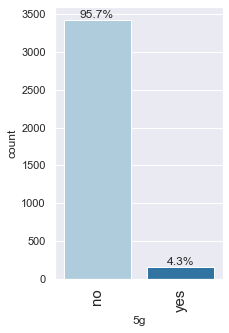

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "5g", perc=True)

- Only a few smartphones in this data provide 5G network.

**`release_year`**

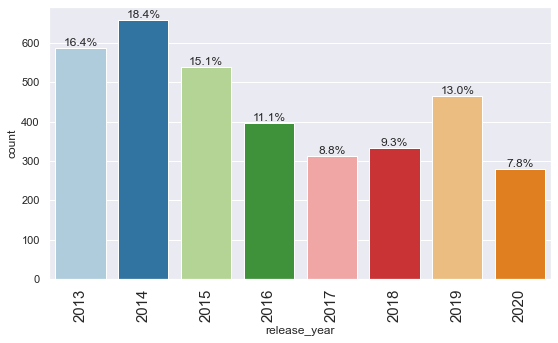

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "release_year", perc=True)

- Around 50% of the phones in the data were originally released in 2015 or before.

### Bivariate Analysis

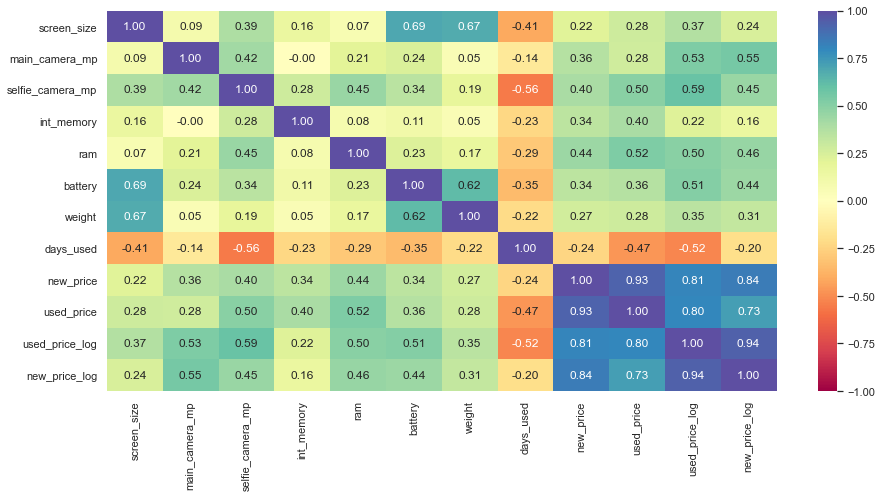

<IPython.core.display.Javascript object>

In [39]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

- The used phone price is highly correlated with the price of a new phone model.
    - This makes sense as the price of a new phone model is likely to affect the used phone price.
- Weight, screen size, and battery capacity of a phone show a good amount of correlation.
    - This makes sense as larger battery capacity requires bigger space, thereby increasing phone screen size and phone weight.
- The release year of the phones and the number of days it was used are negatively correlated.

**The amount of RAM is important for the smooth functioning of a phone. Let's see how the amount of RAM varies across brands.**

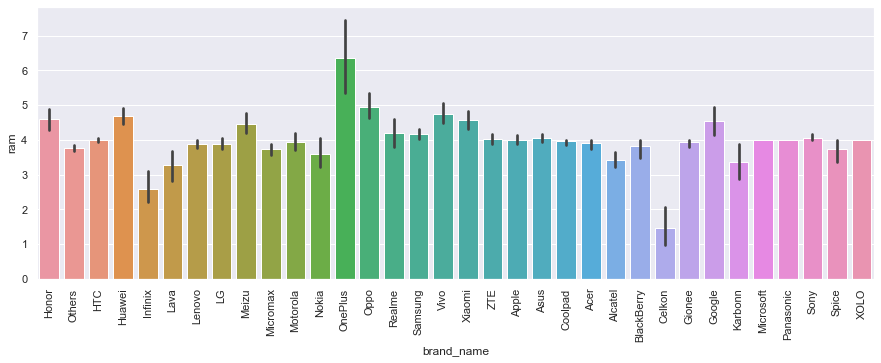

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations**

- Most of the companies offer around 4GB of RAM on average.
- OnePlus offers the highest amount of RAM in general, while Celkon offers the least.

**People who travel frequently require phones with large batteries to run through the day. But large battery often increases a phone's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those phones which offer a large battery and analyze.**

In [41]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(346, 17)

<IPython.core.display.Javascript object>

In [42]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Acer         147.500000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Asus         199.357143
Motorola     200.757143
Gionee       209.430000
Honor        210.166667
Xiaomi       218.327586
Samsung      223.733333
Others       238.094737
Lenovo       258.000000
LG           264.128571
Huawei       302.277778
Apple        312.100000
Nokia        318.000000
Alcatel             NaN
Google              NaN
HTC                 NaN
Sony                NaN
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

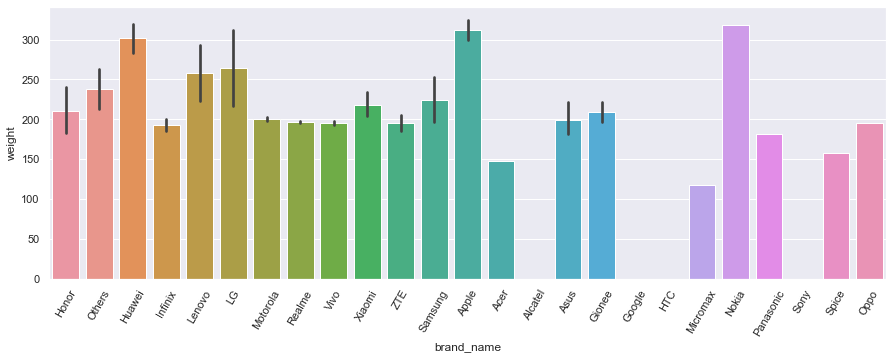

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

**Observations**

- A lot of brands offer phones which are not very heavy but have a large battery capacity.
- Some phones offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
- Some phones offered by brands like Huawei, Apple, Nokia, etc. offer great batteries but are heavy.
- Google, HTC, Sony, and Alcatel do not offer phones with a battery capacity greater than 4500 mAh.

**People who buy phones primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those phones which are suitable for such people and analyze.**

In [44]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(726, 17)

<IPython.core.display.Javascript object>

In [45]:
df_large_screen.brand_name.value_counts()

Samsung      86
Huawei       82
Others       62
LG           54
Oppo         52
Lenovo       44
Honor        42
Motorola     40
Asus         32
Vivo         32
Realme       30
Xiaomi       29
Meizu        23
Alcatel      23
Nokia        14
Acer         13
ZTE          10
Apple         9
Infinix       8
Micromax      8
Sony          8
HTC           6
XOLO          3
Google        3
Gionee        3
OnePlus       2
Panasonic     2
Karbonn       2
Celkon        2
Coolpad       1
Spice         1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

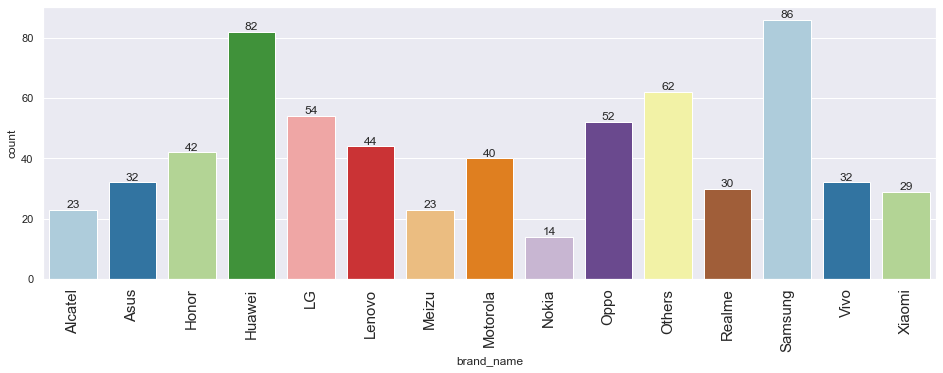

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df_large_screen, "brand_name", n=15)

**Observations**

- Huawei and Samsung offer a lot of phones suitable for customers buying phones for entertainment purposes.
- Brands like Alcatel, Meizu, and Nokia offer fewer phones for this customer segment.

## Data Preprocessing

### Feature Engineering

- Let's create a new column `phone_category` from the `new_price` column to tag phones as budget, mid-ranger, or premium.

In [47]:
df["phone_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["phone_category"].value_counts()

Budget        1904
Mid-ranger    1060
Premium        607
Name: phone_category, dtype: int64

<IPython.core.display.Javascript object>

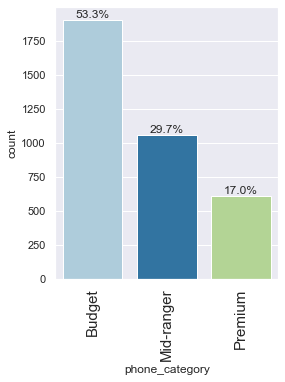

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(df, "phone_category", perc=True)

- More than half the phones in the data are budget phones.

**Everyone likes a good phone camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those phones which are suitable for this customer segment and analyze.**

In [49]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(666, 18)

<IPython.core.display.Javascript object>

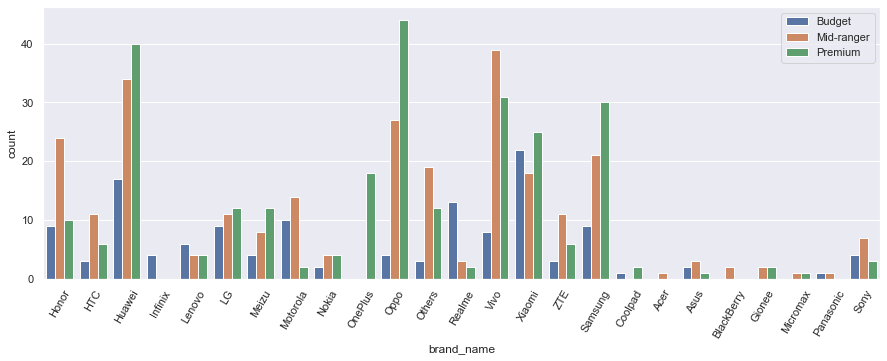

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="phone_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Observations**

- Huawei is the go-to brand for this customer segment as they offer many phones across different price ranges with powerful front cameras.
- Xiaomi and Realme also offer a lot of budget phones capable of shooting crisp selfies.
- Oppo and Vivo offer many mid-rangers with great selfie cameras.
- Oppo, Vivo, and Samsung offer many premium phones for this customer segment.

**Let's do a similar analysis for rear cameras.**

In [51]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 18)

<IPython.core.display.Javascript object>

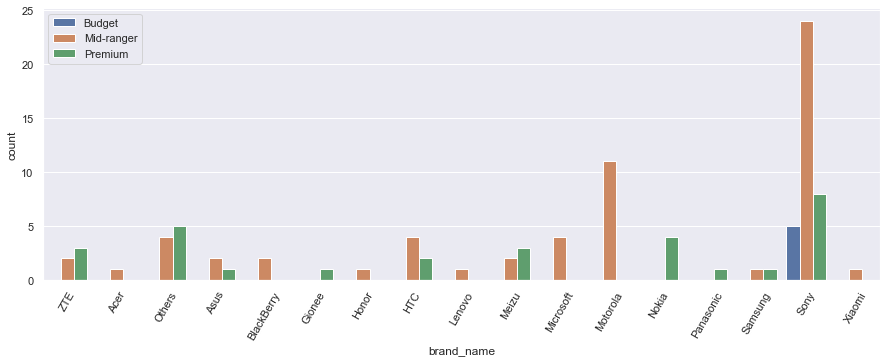

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera, x="brand_name", hue="phone_category")
plt.xticks(rotation=60)
plt.legend(loc=2)
plt.show()

**Observations**

- Sony is the go-to brand for great rear cameras as they offer many phones across different price ranges.
- No brand other than Sony seems to be offering great rear cameras in budget phones.
- Brands like Motorola and HTC offer mid-rangers with great rear cameras.
- Nokia offers a few premium phones with great rear cameras.

**Let's see how the price of used phones varies across the years.**

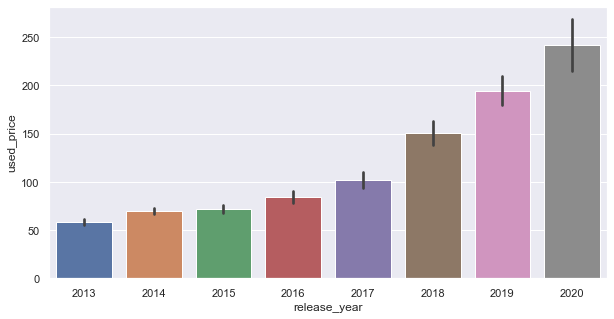

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price")
plt.show()

- The price of used phones has increased over the years.

**Let's check the distribution of 4G and 5G phones wrt price segments.**

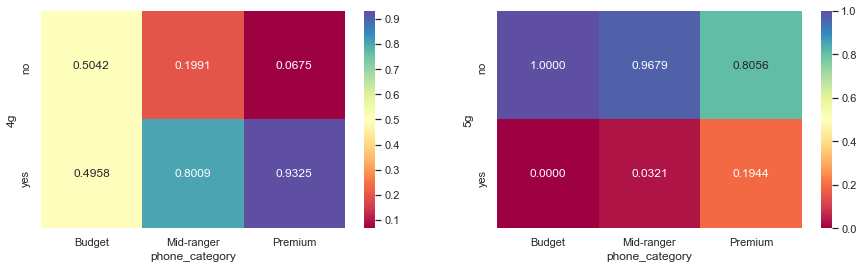

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["phone_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["phone_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

**Observations**

- There is an almost equal number of 4G and non-4G budget phones, but there are no budget phones offering 5G network.
- Most of the mid-rangers and premium phones offer 4G network.
- Very few mid-rangers (~3%) and around 20% of the premium phones offer 5G mobile network.

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [55]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [56]:
# checking for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size         783
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           32
ram                  13
battery               6
weight              283
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
phone_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [57]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [58]:
# checking for missing values
df1.isnull().sum()

brand_name            0
os                    0
screen_size          49
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight               12
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
phone_category        0
dtype: int64

<IPython.core.display.Javascript object>

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [59]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

<IPython.core.display.Javascript object>

In [60]:
# checking for missing values
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
phone_category       0
dtype: int64

<IPython.core.display.Javascript object>

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [61]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
phone_category      0
dtype: int64

<IPython.core.display.Javascript object>

- All missing values have been imputed.

### Outlier Check

- Let's check for outliers in the data.

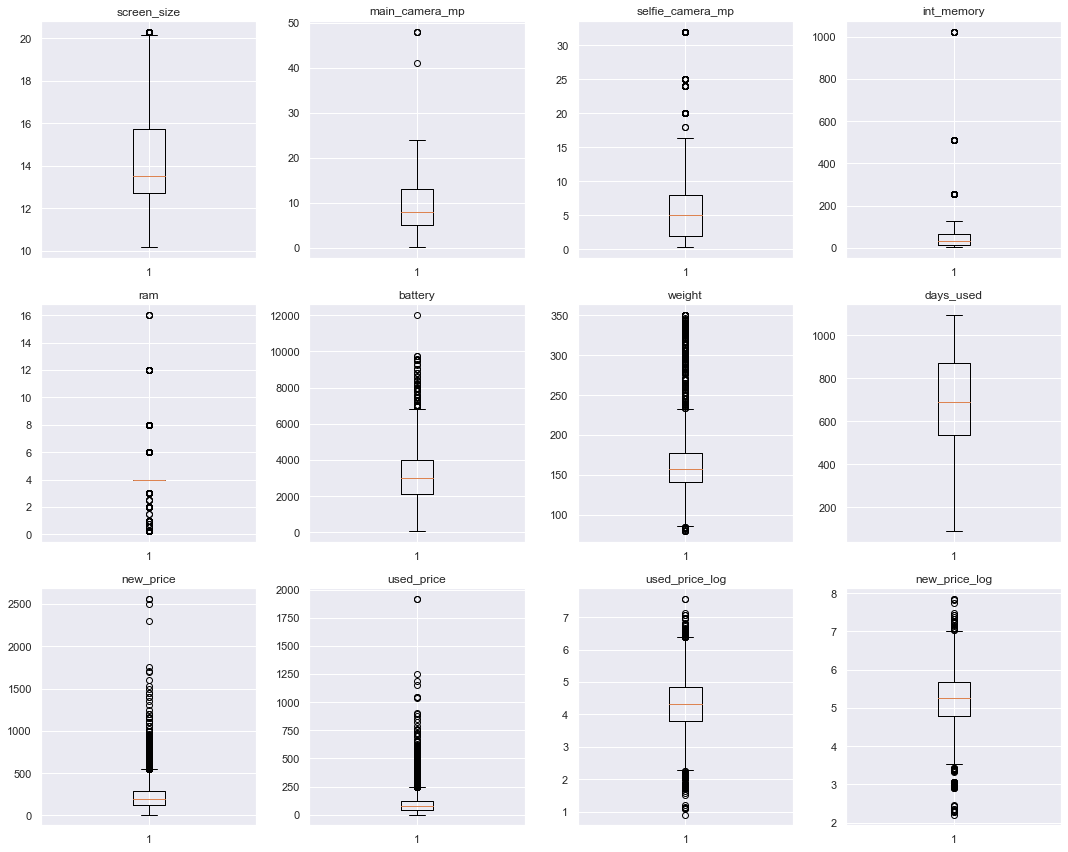

<IPython.core.display.Javascript object>

In [62]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

In [63]:
# let's check the statistical summary of the data once
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.009864,2.598943,10.16,12.7,13.49,15.72,20.32
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.0,NaN,NaN,NaN,9.55669,4.756024,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3571.0,NaN,NaN,NaN,6.548166,6.877517,0.3,2.0,5.0,8.0,32.0
int_memory,3571.0,NaN,NaN,NaN,54.625595,84.516152,4.0,16.0,32.0,64.0,1024.0
ram,3571.0,NaN,NaN,NaN,4.061257,1.385743,0.25,4.0,4.0,4.0,16.0
battery,3571.0,NaN,NaN,NaN,3066.443433,1363.409261,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

### Data Preparation for modeling

- We want to predict the used phone price, so we will use the normalized version `used_price_log` for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [64]:
# defining the dependent and independent variables
X = df1.drop(["new_price", "used_price", "used_price_log", "phone_category"], axis=1)
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        16.03  yes   no            13.0   
1      Honor  Android        16.03  yes  yes            13.0   
2      Honor  Android        16.03  yes  yes            13.0   
3      Honor  Android        16.03  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   185.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

<IPython.core.display.Javascript object>

In [65]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,16.03,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,16.03,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.03,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,16.03,13.0,8.0,64.0,6.0,7250.0,185.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [66]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [67]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [68]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5154.
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:44:09   Log-Likelihood:                 2685.5
No. Observations:                2499   AIC:                            -5273.
Df Residuals:                    2450   BIC:                            -4988.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.60

<IPython.core.display.Javascript object>

**Observations**

- Both the R-squared and Adjusted R squared of our model are 0.99, indicating that it can explain 99% of the variance in the price of used phones.

- This is a clear indication that we have been able to create a very good model which is not underfitting the data.

- To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

**Let's check the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [69]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,11.257794,6.953949,6.933773


<IPython.core.display.Javascript object>

In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,11.520102,7.285328,7.118208


<IPython.core.display.Javascript object>

**Observations**

- RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.
- MAE indicates that our current model is able to predict used phone prices within a mean error of ~7.3 euros on test data.
- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- Despite being able to capture 99% of the variation in the data, the MAE is around 7.3 euros as it makes larger predictions errors for the extreme values (very high or very low prices).
- MAPE of ~7.1 on the test data indicates that the model can predict within ~7.1% of the used phone price.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [73]:
checking_vif(x_train1)

,feature,VIF
0,const,3.682943e+06
1,screen_size,2.708324e+00
2,main_camera_mp,2.223471e+00
3,selfie_camera_mp,2.878177e+00
4,int_memory,1.275161e+00
5,ram,1.796204e+00
6,battery,1.909542e+00
7,weight,1.888805e+00
8,release_year,4.778527e+00
9,days_used,2.605099e+00


<IPython.core.display.Javascript object>

**Observations**

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [74]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'release_year', 'days_used', 'new_price_log', 'brand_name_Gionee', 'brand_name_Panasonic', '5g_yes']


<IPython.core.display.Javascript object>

In [75]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

<IPython.core.display.Javascript object>

In [76]:
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.116e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:44:12   Log-Likelihood:                 2662.2
No. Observations:                2499   AIC:                            -5310.
Df Residuals:                    2492   BIC:                            -5270.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4531 

<IPython.core.display.Javascript object>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,11.449273,7.092622,7.035549


<IPython.core.display.Javascript object>

In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,11.363978,7.215069,7.034703


<IPython.core.display.Javascript object>

**Observations**

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variables.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [79]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1248,4.593806,4.614640,-0.020834
2206,4.887488,4.865724,0.021764
1623,3.229618,3.314016,-0.084398
2245,4.646888,4.560469,0.086418
1043,3.669187,3.765447,-0.096260


<IPython.core.display.Javascript object>

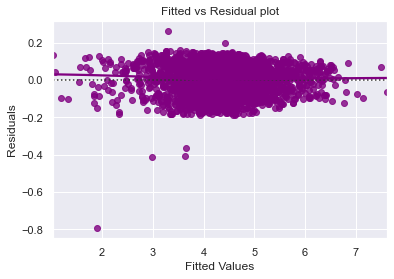

<IPython.core.display.Javascript object>

In [80]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

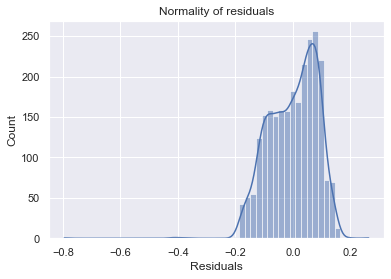

<IPython.core.display.Javascript object>

In [81]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals does have a slight bell shape.
- Let's check the Q-Q plot.

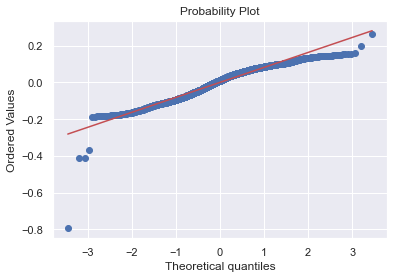

<IPython.core.display.Javascript object>

In [82]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [83]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9549560546875, pvalue=4.112263720997103e-27)

<IPython.core.display.Javascript object>

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [84]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.9020132262470774), ('p-value', 0.9653733287321825)]

<IPython.core.display.Javascript object>

**Observations**

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

**All the assumptions of linear regression are satisfied. Let's rebuild our final model, check its performance, and draw inferences from it.**

## Final Model Summary

In [85]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.116e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:44:15   Log-Likelihood:                 2662.2
No. Observations:                2499   AIC:                            -5310.
Df Residuals:                    2492   BIC:                            -5270.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4531 

<IPython.core.display.Javascript object>

In [86]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train2, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,11.449273,7.092622,7.035549


<IPython.core.display.Javascript object>

In [87]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test2, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,11.363978,7.215069,7.034703


<IPython.core.display.Javascript object>

## Actionable Insights

- The model explains 99% of the variation in the data and can predict within 7 euros of the used phone price.


- The most significant predictors of the used phone price are the price of a new phone of the same model, the release year of the phone, the number of days it was used, and the availability of 5G network.


- One percent increase in new phone price will result in a one percent increase in the used phone price. *[100 * {(1.01)**(1.0000) - 1} = 1]*


- A unit increase in the number of days used decreases the used phone price by 0.11%. *[100 * {exp(0.0011) - 1} = 0.11]*

## Recommendations

- The model can be used for predictive purposes as it can predict the used phone price within ~7%.


- ReCell should look to attract people who want to sell used phones which have been released in recent years and have not been used for many days.


- They should also try to gather and put up phones having a high price for new models to try and increase revenue.
    - They can focus on volume for the budget phones and offer discounts during festive sales on premium phones.


- Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different segments.